Association rule exercise

In [112]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTEN
import numpy as np

In [113]:
df = pd.read_csv('votes.csv')
df = df.drop('Unnamed: 0', axis=1)
column_names=['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

In [114]:
df.columns = column_names

In [115]:
# Two ways to replace values
#df = df.replace({'y': 1, 'n': 0, '?': 0})

# or: 
mapping = {'y': 1, 'n': 0, '?': 0}

df = df.applymap(lambda x: mapping.get(x, x))

In [116]:
party_votes = df.groupby('Class Name').sum()
party_votes = party_votes.reset_index()

In [117]:
party_votes

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,democrat,156,120,231,14,55,123,200,218,188,124,129,36,73,90,160,173
1,republican,31,74,22,162,156,148,39,24,19,91,21,134,135,157,14,95


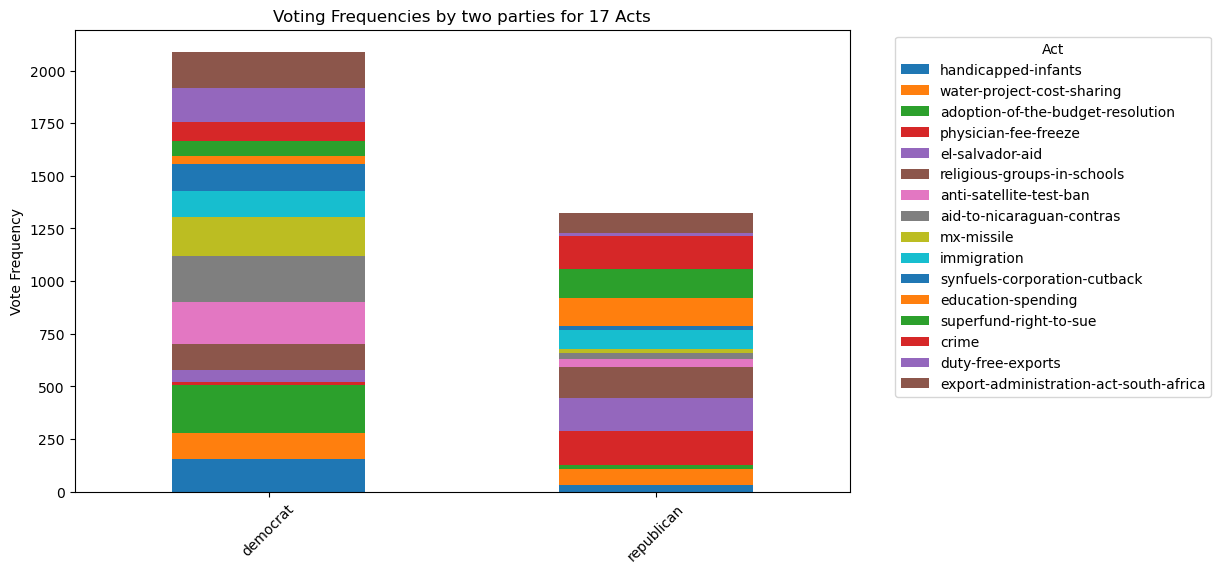

In [118]:

# Create a bar chart
ax = party_votes.plot(kind='bar', stacked=True, figsize=(10, 6))
#plt.xlabel('Party')
plt.ylabel('Vote Frequency')
plt.title('Voting Frequencies by two parties for 17 Acts')
plt.legend(title='Act', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(len(party_votes)), party_votes['Class Name'])
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [119]:
#def encode_unites(x):
   # if x <= 0:
        #return 0
    #if x >= 1:
        #return 1

In [120]:
#df.iloc[:, 1:17] = df.iloc[:, 1:17].applymap(encode_unites)

In [121]:
voting_df_rep = df[df['Class Name'] == 'republican']
voting_df_dem = df[df['Class Name'] == 'democrat']

In [122]:
voting_set_rep = voting_df_rep.iloc[:, 1:18].copy()
voting_set_dem = voting_df_dem.iloc[:, 1:18].copy()

In [123]:
total_votes = len(df)
total_democrat_votes = len(voting_set_dem)
total_republican_votes = len(voting_set_rep)

# Define the minimum support thresholds for each class
min_support_dem = (0.60 * total_democrat_votes)/total_votes
min_support_rep =( 0.40 * total_republican_votes)/total_votes

In [124]:
min_support_rep

0.15391705069124423

In [125]:
frequent_itemsets_rep= apriori(voting_set_rep, min_support=min_support_rep, use_colnames=True)

c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [126]:
rules_rep = association_rules(frequent_itemsets_rep, metric="lift", min_threshold=1) 

In [127]:
rules_rep[ (rules_rep['lift'] >= 1.5) & (rules_rep['confidence'] >= 0.90) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
386,"(crime, anti-satellite-test-ban)",(export-administration-act-south-africa),0.227545,0.568862,0.209581,0.921053,1.619114,0.080139,5.461078,0.495017
1166,"(physician-fee-freeze, crime, anti-satellite-t...",(export-administration-act-south-africa),0.215569,0.568862,0.197605,0.916667,1.611404,0.074976,5.173653,0.483692
1394,"(el-salvador-aid, crime, anti-satellite-test-ban)",(export-administration-act-south-africa),0.191617,0.568862,0.173653,0.906250,1.593092,0.064649,4.598802,0.460536
2975,"(el-salvador-aid, physician-fee-freeze, crime,...",(export-administration-act-south-africa),0.185629,0.568862,0.167665,0.903226,1.587776,0.062067,4.455090,0.454569


In [128]:
frequent_itemsets_dem= apriori(voting_set_dem, min_support=min_support_dem, use_colnames=True)

c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [129]:
rules_dem = association_rules(frequent_itemsets_dem, metric="lift", min_threshold=1) 

In [146]:
rules_dem[ (rules_dem['lift'] >= 1.25) & (rules_dem['confidence'] >= 0.9) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
375,"(mx-missile, adoption-of-the-budget-resolution...","(anti-satellite-test-ban, aid-to-nicaraguan-co...",0.415730,0.707865,0.378277,0.909910,1.285428,0.083996,3.242697,0.380046
381,"(anti-satellite-test-ban, mx-missile, handicap...","(adoption-of-the-budget-resolution, aid-to-nic...",0.397004,0.760300,0.378277,0.952830,1.253230,0.076435,5.081648,0.335096
382,"(aid-to-nicaraguan-contras, mx-missile, handic...","(anti-satellite-test-ban, adoption-of-the-budg...",0.419476,0.689139,0.378277,0.901786,1.308569,0.089200,3.165134,0.406196
405,"(duty-free-exports, mx-missile, adoption-of-th...","(anti-satellite-test-ban, aid-to-nicaraguan-co...",0.430712,0.707865,0.389513,0.904348,1.277571,0.084627,3.054137,0.381642


In [132]:
data = df.iloc[:, 1:18]
target = df.iloc[:, 0]

In [133]:
target.value_counts()

democrat      267
republican    167
Name: Class Name, dtype: int64

In [134]:
np.random.seed(123)
os = SMOTEN()

X_new, y_new = os.fit_resample(data, target)

In [135]:
# Combine X_new and y_new into a DataFrame
df_resampled = pd.DataFrame(data=X_new, columns=data.columns)
df_resampled['target'] = y_new

In [136]:
voting_df_rep_resample = df_resampled[df_resampled['target'] == 'republican']
voting_df_dem_resample= df_resampled[df_resampled['target'] == 'democrat']

In [137]:
voting_set_rep_resample = voting_df_rep_resample.iloc[:, :-1].copy()
voting_set_dem_resample = voting_df_dem_resample.iloc[:, :-1].copy()

In [138]:
# Rule for rep
frequent_itemsets_rep_resample= apriori(voting_set_rep_resample, min_support=0.11, use_colnames=True)

c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [139]:
rules_rep_re = association_rules(frequent_itemsets_rep_resample, metric="lift", min_threshold=1) 

In [140]:
rules_rep_re[ (rules_rep_re['lift'] >= 1.75) & (rules_rep_re['confidence'] >= 0.95) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6884,"(el-salvador-aid, anti-satellite-test-ban, imm...","(physician-fee-freeze, crime, export-administr...",0.127341,0.569288,0.127341,1.0,1.756579,0.054847,inf,0.493562


In [141]:
frequent_itemsets_dem_resample= apriori(voting_set_dem_resample, min_support=0.11, use_colnames=True)

c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [142]:
rules_dem_re = association_rules(frequent_itemsets_dem_resample, metric="lift", min_threshold=1) 

In [143]:
rules_dem_re[ (rules_dem_re['lift'] >= 2.1) & (rules_dem_re['confidence'] >= 0.9) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
532,"(el-salvador-aid, superfund-right-to-sue)",(crime),0.142322,0.337079,0.131086,0.921053,2.732456,0.083112,8.397004,0.739239
1554,"(water-project-cost-sharing, superfund-right-t...",(religious-groups-in-schools),0.116105,0.460674,0.112360,0.967742,2.100708,0.058873,16.719101,0.592797
1854,"(superfund-right-to-sue, crime, adoption-of-th...",(religious-groups-in-schools),0.119850,0.460674,0.119850,1.000000,2.170732,0.064638,inf,0.612766
2298,"(el-salvador-aid, superfund-right-to-sue, crime)",(religious-groups-in-schools),0.131086,0.460674,0.127341,0.971429,2.108711,0.066953,18.876404,0.605096
2299,"(el-salvador-aid, superfund-right-to-sue, reli...",(crime),0.134831,0.337079,0.127341,0.944444,2.801852,0.081892,11.932584,0.743316
2390,"(superfund-right-to-sue, crime, synfuels-corpo...",(religious-groups-in-schools),0.116105,0.460674,0.112360,0.967742,2.100708,0.058873,16.719101,0.592797
